In [1]:
from sensray import EarthModelManager, RayPathTracer, EarthPlotter, Earth3DVisualizer

import matplotlib.pyplot as plt
import pyvista as pv
pv.set_jupyter_backend('trame')  # Interactive backend for Jupyter

### Plotting the 1D Earth model

You can visualize the 1D profiles (e.g., Vp and Vs vs. depth) for any TauP model using `EarthModelManager.plot_1d_profile()`. The example below plots Vp and Vs for `iasp91` down to 700 km depth.

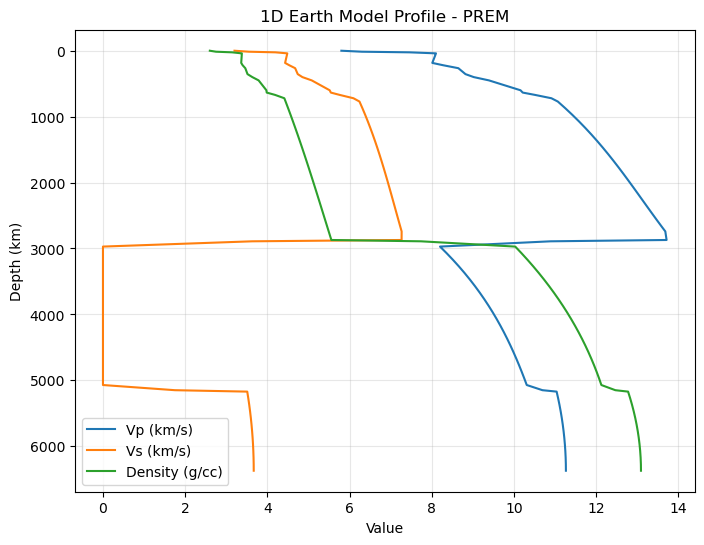

In [2]:
# Visualize 1D Earth model profiles (Vp, Vs) for iasp91
emm = EarthModelManager()
emm.plot_1d_profile('prem', properties=['vp','vs', 'rho'], max_depth_km=6371)
plt.show()

In [3]:
# Example: Geographic coordinates (Realistic seismic scenario)
source_lat, source_lon = 0, 0       # Source at equator, 0° longitude
source_depth_km = 10.0               # 10 km depth
receiver_lat, receiver_lon = 0, 60  # 60 degrees away

tracer = RayPathTracer(model_name='prem')

# Get ray paths using geographic coordinates - REQUEST MULTIPLE PHASES
ray_paths, geo_info = tracer.get_ray_paths(
    source_lat=source_lat,
    source_lon=source_lon,
    source_depth=source_depth_km,
    receiver_lat=receiver_lat,
    receiver_lon=receiver_lon,
    phases=['P', 'PP', 'S', 'SS']   # Multiple phases for testing
)

print(f"📏 Distance: {geo_info['distance_deg']:.1f}° ({geo_info['distance_km']:.0f}km)")
print(f"📐 Azimuth: {geo_info['azimuth']:.1f}°")
print(f"🌊 Ray paths found: {len(ray_paths)}")

# Show details for ALL ray paths found
for i, ray in enumerate(ray_paths):
    print(f"\n--- Ray {i+1} ---")
    print(f"⏱️  Travel time: {ray.time:.1f} seconds")
    print(f"🎯 Phase: {ray.name}")
    print(f"📊 Ray path points: {len(ray.path['depth'])}")
    print(f"🏔️  Maximum depth: {max(ray.path['depth']):.1f} km")

📏 Distance: 60.0° (6679km)
📐 Azimuth: 90.0°
🌊 Ray paths found: 12

--- Ray 1 ---
⏱️  Travel time: 605.5 seconds
🎯 Phase: P
📊 Ray path points: 272
🏔️  Maximum depth: 1554.3 km

--- Ray 2 ---
⏱️  Travel time: 737.6 seconds
🎯 Phase: PP
📊 Ray path points: 340
🏔️  Maximum depth: 774.0 km

--- Ray 3 ---
⏱️  Travel time: 747.7 seconds
🎯 Phase: PP
📊 Ray path points: 304
🏔️  Maximum depth: 651.3 km

--- Ray 4 ---
⏱️  Travel time: 747.8 seconds
🎯 Phase: PP
📊 Ray path points: 308
🏔️  Maximum depth: 670.0 km

--- Ray 5 ---
⏱️  Travel time: 826.0 seconds
🎯 Phase: PP
📊 Ray path points: 112
🏔️  Maximum depth: 133.4 km

--- Ray 6 ---
⏱️  Travel time: 827.2 seconds
🎯 Phase: PP
📊 Ray path points: 128
🏔️  Maximum depth: 220.0 km

--- Ray 7 ---
⏱️  Travel time: 1099.3 seconds
🎯 Phase: S
📊 Ray path points: 364
🏔️  Maximum depth: 1464.4 km

--- Ray 8 ---
⏱️  Travel time: 1339.1 seconds
🎯 Phase: SS
📊 Ray path points: 460
🏔️  Maximum depth: 791.9 km

--- Ray 9 ---
⏱️  Travel time: 1374.2 seconds
🎯 Phase: SS
📊

/home/adrian/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


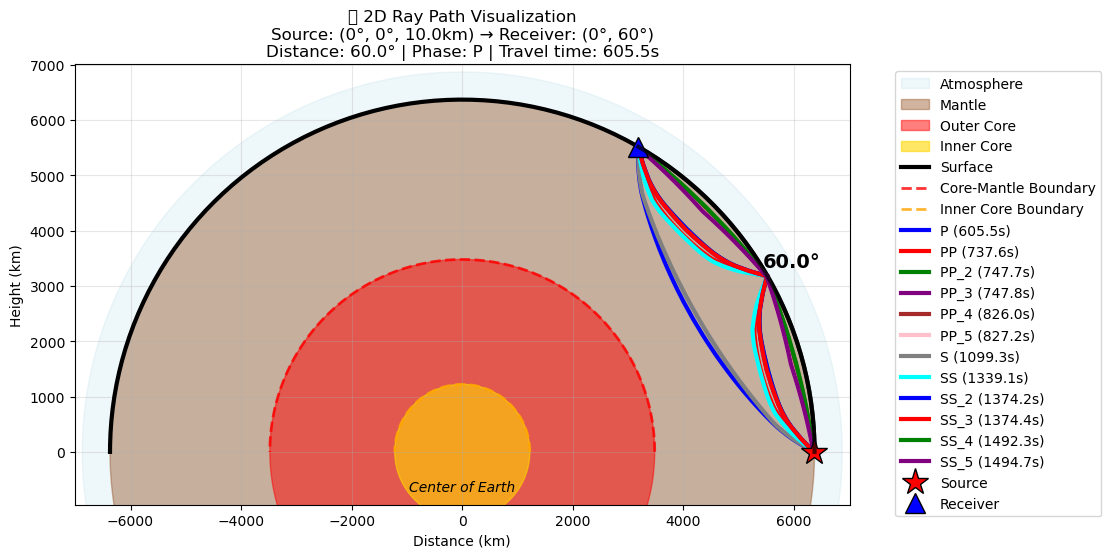

✅ 2D visualization complete!


In [4]:
# Create 2D plotter
plotter = EarthPlotter()

# Plot the ray paths using seisray's built-in method
if ray_paths:
    # Extract ray coordinates for plotting
    ray_coordinates = tracer.extract_ray_coordinates(ray_paths)

    # Create the circular Earth plot
    fig = plotter.plot_circular_earth(
        ray_coordinates=ray_coordinates,
        source_depth=source_depth_km,
        distance_deg=geo_info['distance_deg'],
        fig_size=(10, 10)
    )

    plt.title(f"🌍 2D Ray Path Visualization\n"
              f"Source: ({source_lat}°, {source_lon}°, {source_depth_km}km) → "
              f"Receiver: ({receiver_lat}°, {receiver_lon}°)\n"
              f"Distance: {geo_info['distance_deg']:.1f}° | Phase: {ray_paths[0].name} | "
              f"Travel time: {ray_paths[0].time:.1f}s")

    plt.show()

    print(f"✅ 2D visualization complete!")
else:
    print(f"⚠️  No ray paths to visualize")

## 🌍 3D Interactive Earth Visualization

Now let's create **interactive 3D visualizations** of Earth and seismic ray paths using geographic coordinates! This system is designed to be extensible for:

- **Ray paths** in true 3D geographic space
- **Meshes** (your future work) 
- **Interior structure** (velocity, density)
- **Interactive exploration**

For this we'll use **PyVista** - a powerful Python 3D visualization library built on VTK that's perfect for scientific applications.

In [5]:
# Create new visualizer instance
viz3d = Earth3DVisualizer()

# Get ray paths with geographic coordinates for 3D visualization
# Use the same multiple phases as above
ray_paths_geo_3d, info_3d = tracer.get_ray_paths(
    source_lat=source_lat, source_lon=source_lon, source_depth=source_depth_km,
    receiver_lat=receiver_lat, receiver_lon=receiver_lon,
    phases=['P', 'PP', 'S', 'SS'], output_geographic=True
)

print(f"✅ Got {len(ray_paths_geo_3d)} ray paths for 3D visualization:")
# Group by phase name to show how many of each type
phase_counts = {}
for arrival in ray_paths_geo_3d:
    phase_name = arrival.name
    if phase_name not in phase_counts:
        phase_counts[phase_name] = 0
    phase_counts[phase_name] += 1

for phase_name, count in phase_counts.items():
    print(f"   {phase_name}: {count} ray paths")

print(f"\nTotal ray paths to plot: {len(ray_paths_geo_3d)}")

✅ Got 12 ray paths for 3D visualization:
   P: 1 ray paths
   PP: 5 ray paths
   S: 1 ray paths
   SS: 5 ray paths

Total ray paths to plot: 12


In [6]:
# Create new visualizer with updated code
viz3d = Earth3DVisualizer()

print(f"🔄 Plotting {len(ray_paths_geo_3d)} ray paths in 3D with continents...")
print("Expected phases:", set(arr.name for arr in ray_paths_geo_3d))

# Plot all ray paths in 3D with continent outlines, line-only rendering
plotter = viz3d.plot_3d_earth_and_rays(
    ray_paths=ray_paths_geo_3d,
    source_lat=source_lat,
    source_lon=source_lon,
    source_depth=source_depth_km,
    receiver_lat=receiver_lat,
    receiver_lon=receiver_lon,
    show_earth=True,
    show_continents=True,
    notebook=True,
    show_endpoints=False,
    ray_line_width=2.0,
    continents_line_width=0.8,
)

print("✅ Lines only (no nodes) + continent outlines should now be visible in the 3D plot!")
plotter.show()  # Opens interactive 3D window

🔄 Plotting 12 ray paths in 3D with continents...
Expected phases: {'P', 'SS', 'PP', 'S'}
✅ Lines only (no nodes) + continent outlines should now be visible in the 3D plot!


Widget(value='<iframe src="http://localhost:44595/index.html?ui=P_0x7f990c1507d0_0&reconnect=auto" class="pyvi…